<a href="https://colab.research.google.com/github/AthaSSiN/secyQ4ML/blob/master/polyReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

[8.34044009e+00 1.44064899e+01 2.28749635e-03 6.04665145e+00
 2.93511782e+00 1.84677190e+00 3.72520423e+00 6.91121454e+00
 7.93534948e+00 1.07763347e+01 8.38389029e+00 1.37043900e+01
 4.08904499e+00 1.75623487e+01 5.47751864e-01 1.34093502e+01
 8.34609605e+00 1.11737966e+01 2.80773877e+00 3.96202978e+00
 1.60148914e+01 1.93652315e+01 6.26848356e+00 1.38464523e+01
 1.75277830e+01 1.78921333e+01 1.70088423e+00 7.81095665e-01
 3.39660839e+00 1.75628501e+01 1.96693668e+00 8.42215250e+00
 1.91577906e+01 1.06633057e+01 1.38375423e+01 6.31031262e+00
 1.37300186e+01 1.66925134e+01 3.65765547e-01 1.50028863e+01
 1.97772218e+01 1.49633131e+01 5.60887984e+00 1.57855866e+01
 2.06452013e+00 8.95787052e+00 1.81719101e+01 5.87228297e+00
 5.75550677e+00 2.60057144e+00]
[ 7.37289952e+00  1.38871542e+01  5.23263497e-06 -1.41693848e+00
  6.01731126e-01  1.77688973e+00 -2.05274139e+00  4.06069227e+00
  7.90909508e+00 -1.05183827e+01  7.23406694e+00  1.24409086e+01
 -3.32002213e+00 -1.68608624e+01  2.85252

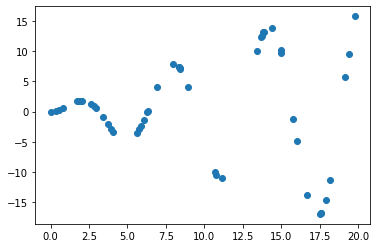

In [317]:
dataPoints = 50
lb = 0
ub = 20
np.random.seed(1)

x = ub*np.random.rand(dataPoints)

#assigning xsin(x) to be the generator function
def f(x):
  return x*np.sin(x)

y = f(x)

print(x)
print(y)

plt.scatter(x,y)
plt.show()

In [0]:
n = 14 #maximum degree of the polynomial

In [319]:
X = [[i**j for j in range(n+1)] for i in x] # X is such that each row of X contains the all the powers from 0 to n of the corresp value in x
X = np.reshape(X, (dataPoints,n+1)) #converting into a numpy array
print(X)


[[1.00000000e+00 8.34044009e+00 6.95629410e+01 5.80185542e+02
  4.83900276e+03 4.03594126e+04 3.36615263e+05 2.80751944e+06
  2.34159477e+07 1.95299309e+08 1.62888219e+09 1.35855943e+10
  1.13309835e+11 9.45053893e+11 7.88216538e+12]
 [1.00000000e+00 1.44064899e+01 2.07546950e+02 2.99002304e+03
  4.30757366e+04 6.20570163e+05 8.94023776e+06 1.28797445e+08
  1.85551908e+09 2.67315169e+10 3.85107327e+11 5.54804481e+12
  7.99278513e+13 1.15147978e+15 1.65887818e+16]
 [1.00000000e+00 2.28749635e-03 5.23263954e-06 1.19696438e-08
  2.73805165e-11 6.26328315e-14 1.43272373e-16 3.27735031e-19
  7.49692685e-22 1.71491928e-24 3.92287159e-27 8.97355442e-30
  2.05269730e-32 4.69553756e-35 1.07410250e-37]
 [1.00000000e+00 6.04665145e+00 3.65619938e+01 2.21077633e+02
  1.33677939e+03 8.08303904e+03 4.88753198e+04 2.95532023e+05
  1.78697914e+06 1.08052400e+07 6.53355201e+07 3.95061118e+08
  2.38879688e+09 1.44442221e+10 8.73391767e+10]
 [1.00000000e+00 2.93511782e+00 8.61491660e+00 2.52857952e+01
  

In [320]:
#for a single variable polynomial regression, we have the formula weights = (X^T*X)^-1*X^T*y
weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T , X)),(X.T)),y)
print(weights)

[ 4.51986328e-02  1.00368957e+01 -2.48776324e+01  2.41692382e+01
 -1.12072211e+01  2.76606942e+00 -3.79058906e-01  2.72008626e-02
 -6.07501479e-04 -4.39318565e-05  2.69104908e-06  3.67187903e-08
 -7.20827587e-09  2.27778528e-10 -2.41998697e-12]


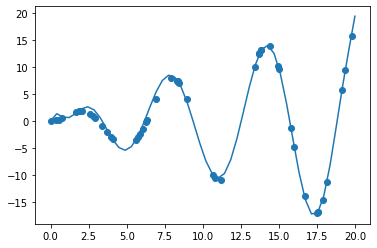

In [321]:
pts = np.linspace(lb,ub, num = dataPoints) # generating a line of points to plot data points
fx = []
for i in pts:
  res = 0
  for j in range(n+1):
    res += weights[j]*i**j  #applying our calculated weights to the variables
  fx.append(res)
plt.scatter(x,y)
plt.plot(pts,fx)
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

<function matplotlib.pyplot.show>

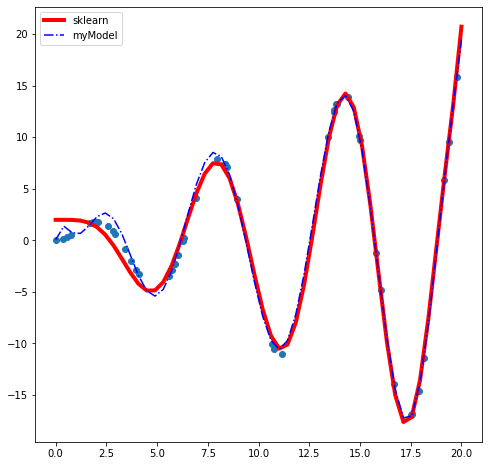

In [334]:
pts = np.reshape(pts, (dataPoints, 1))
x = np.reshape(x, (dataPoints, 1))

model = make_pipeline(PolynomialFeatures(n), LinearRegression()) #using sklearn to perform polynomial regression
model.fit(x, y)
y_plot = model.predict(pts)

plt.rcParams["figure.figsize"] = (8, 8)
plt.plot(pts, y_plot, color='red', linewidth=4, label = 'sklearn') #sklearn results
plt.plot(pts, fx,  linestyle='-.', color = 'blue', label='myModel') #my results
plt.scatter(x,y)
plt.legend()
plt.show